<a href="https://colab.research.google.com/github/HromovAndrey/II_Homework_mood_5_part_4/blob/main/%D0%94%D0%97_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Оберіть одне завдання на вибір

# Завдання 1

За допомогою сегментації зображень замінітть фон для зображення https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/humans.jpg

на фон з https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/forest.jpg

* отримайте маску для зображення людей, де `True` - піксель класу людини, `False` - піксель іншого класу
* зробіть зображення лісу такого ж розміру як і зображення людей
* застосуйте маску щоб змінити значення пікселів зображення лісу на пікселі зображення людей
* Якщо результат поганий можете спробувати використати маску для класу `__background`

In [2]:

!pip install ultralytics opencv-python matplotlib numpy pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [4]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

In [5]:
people_image_url = 'https://github.com/HalyshAnton/IT-Step-Pyton-AI/raw/main/module5/images/humans.jpg'
response_people = requests.get(people_image_url)
people_image = Image.open(BytesIO(response_people.content))

In [6]:
forest_image_url = 'https://github.com/HalyshAnton/IT-Step-Pyton-AI/raw/main/module5/images/forest.jpg'
response_forest = requests.get(forest_image_url)
forest_image = Image.open(BytesIO(response_forest.content))

In [7]:
forest_image = forest_image.resize(people_image.size)

In [8]:
people_image_cv = cv2.cvtColor(np.array(people_image), cv2.COLOR_RGB2BGR)
forest_image_cv = cv2.cvtColor(np.array(forest_image), cv2.COLOR_RGB2BGR)

In [9]:
model = YOLO('yolov8n-seg.pt')

In [10]:
results = model.predict(source=people_image_cv)


0: 384x640 4 persons, 209.9ms
Speed: 5.6ms preprocess, 209.9ms inference, 12.8ms postprocess per image at shape (1, 3, 384, 640)


In [11]:
for mask_data in results[0].masks.data:
    mask = mask_data.cpu().numpy()
    mask_resized = cv2.resize(mask, (people_image_cv.shape[1], people_image_cv.shape[0]))
    combined_mask |= mask_resized.astype(bool)

In [13]:
result_image = forest_image_cv.copy()
result_image[combined_mask] = people_image_cv[combined_mask]
result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

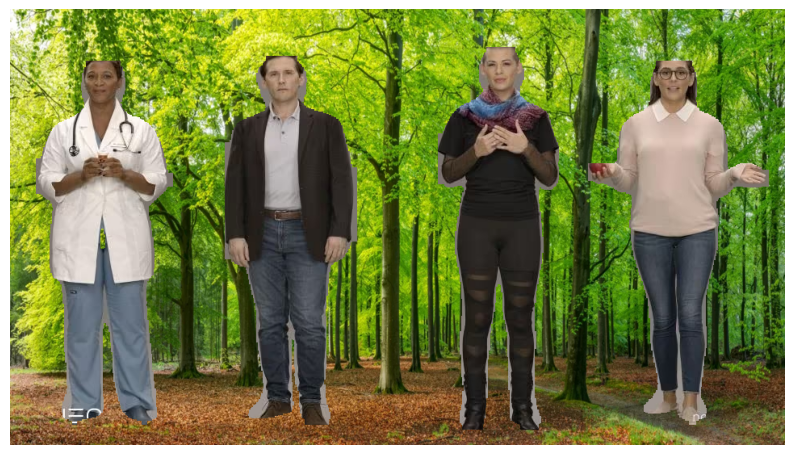

In [14]:
plt.figure(figsize=(10, 10))
plt.imshow(result_image_rgb)
plt.axis('off')
plt.show()

# Завдання 2

Проведіть детекцію об'єктів для відео

https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/Highway%20driving%20during%20the%20day%20front%20view%20camera%20driving%20plate%204k%20footage.mp4

Підберіть параметри для якісного виявлення машин та знаків
Код для перетворення набору зображень у відео є нижче

[документація](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.ArtistAnimation.html)

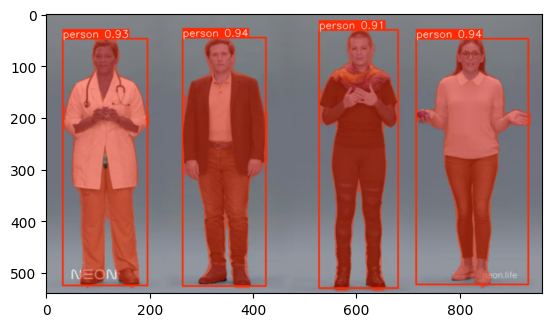

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

img = [] # some array of images
frames = [] # for storing the generated images
fig = plt.figure()
for result in results:
    frames.append([plt.imshow(result.plot())])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('output.mp4')
plt.show()

In [14]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from PIL import Image
import requests

In [15]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 237MB/s]


In [16]:
video_url = 'https://github.com/HalyshAnton/IT-Step-Pyton-AI/raw/main/module5/images/Highway%20driving%20during%20the%20day%20front%20view%20camera%20driving%20plate%204k%20footage.mp4'
video_response = requests.get(video_url, stream=True)
video_path = 'input_video.mp4'

with open(video_path, 'wb') as f:
    f.write(video_response.content)


0: 640x384 1 car, 360.5ms
Speed: 2.3ms preprocess, 360.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 car, 317.8ms
Speed: 2.6ms preprocess, 317.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 car, 317.6ms
Speed: 4.4ms preprocess, 317.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 car, 516.7ms
Speed: 2.8ms preprocess, 516.7ms inference, 8.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 car, 278.0ms
Speed: 2.6ms preprocess, 278.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 car, 306.8ms
Speed: 2.5ms preprocess, 306.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 car, 334.4ms
Speed: 11.4ms preprocess, 334.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 car, 266.5ms
Speed: 4.6ms preprocess, 266.5ms inference, 9.8ms postprocess per image at shape (1, 3, 640, 384)

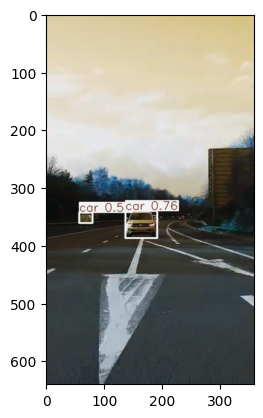

In [17]:
cap = cv2.VideoCapture(video_path)

frames = []
fig = plt.figure()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break


    results = model.predict(source=frame, conf=0.5, iou=0.4, classes=[2, 9])  # 2 - автомобілі, 9 - дорожні знаки


    frame_result = results[0].plot()
    frames.append([plt.imshow(frame_result, animated=True)])

cap.release()


ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True, repeat_delay=1000)


output_video_path = 'output_video.mp4'
ani.save(output_video_path)
plt.show()


In [18]:
from IPython.display import Video

Video(output_video_path, embed=True)


# Завдання 3

Згенеруйте зображення на основі тексту

[документація](https://huggingface.co/docs/diffusers/using-diffusers/conditional_image_generation)

In [24]:
!pip install diffusers[torch] transformers
from diffusers import DiffusionPipeline
generator = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [25]:
generator.safety_checker = lambda images, **kwargs: (images, False)

In [26]:
# Введіть ваш текстовий опис
prompt = "An image of a squirrel in Picasso style"

# Генерація зображення
image = generator(prompt).images[0]

# Збереження зображення
image.save("image_of_squirrel_painting.png")

# Відображення зображення
image.show()


  0%|          | 0/50 [00:00<?, ?it/s]

TypeError: 'bool' object is not iterable